In [27]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv("/content/drive/MyDrive/retail_sales_dataset.csv")

# Display the first few rows of the dataset to understand its structure
print(sales_data.head())



   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [28]:
missing_values = sales_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Check for duplicates
duplicate_rows = sales_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [ ]:
# Calculate basic statistics
mean_sales = sales_data['Total Amount'].mean()
median_sales = sales_data['Total Amount'].median()
mode_sales = sales_data['Total Amount'].mode()  # Note: mode can be a Series if there are multiple modes
std_dev_sales = sales_data['Total Amount'].std()

# Print the results
print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)
print("Standard Deviation of Sales:", std_dev_sales)


Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 0    50
Name: Total Amount, dtype: int64
Standard Deviation of Sales: 559.997631555123


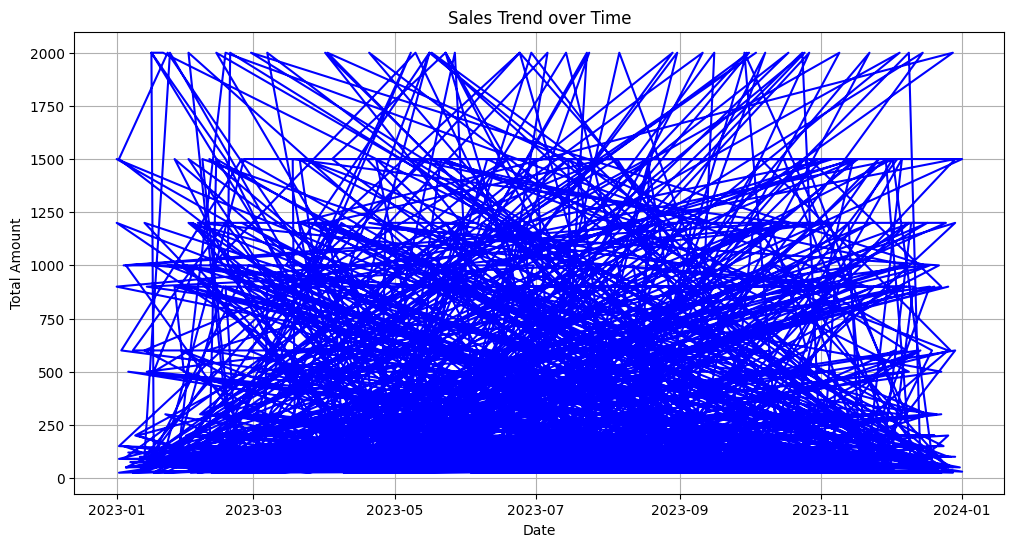

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Date' column is already in datetime format
# If not, convert it to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

 #Set 'Date' column as the index
sales_data.set_index('Date', inplace=True)

# Plotting sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Total Amount'], color='b', linestyle='-')
plt.title('Sales Trend over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


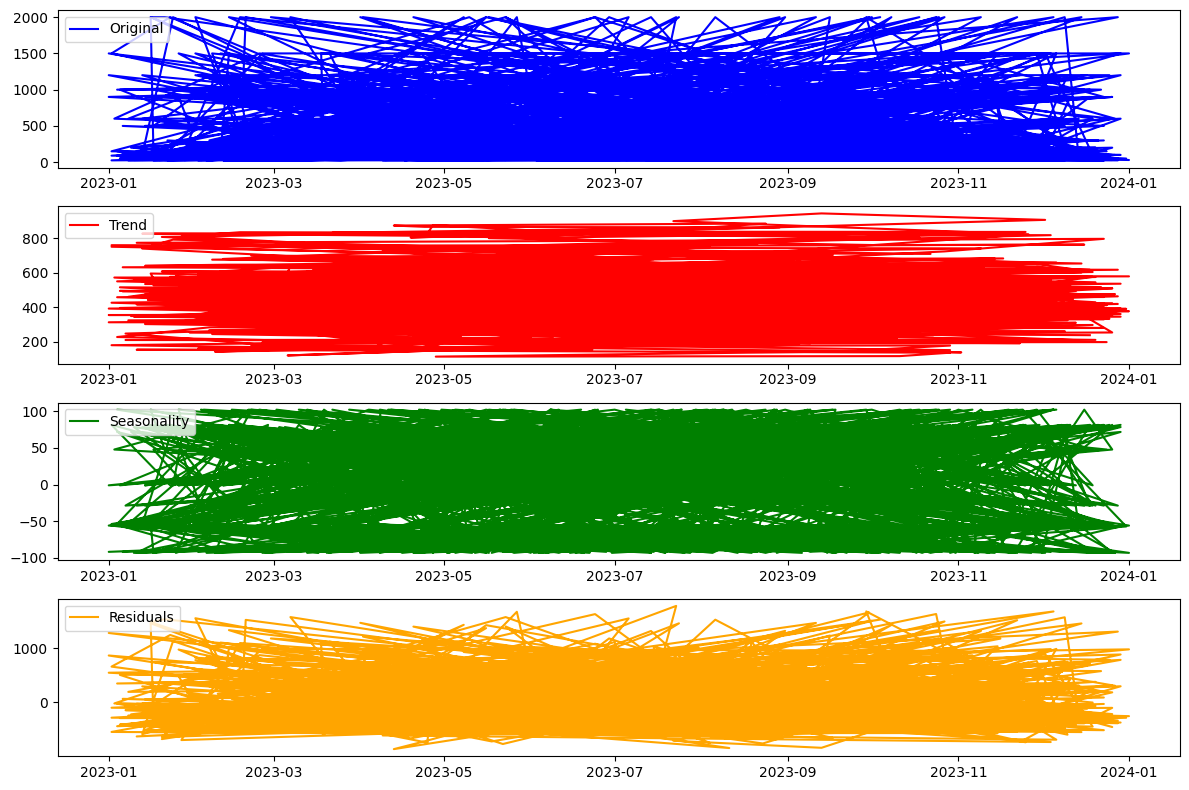

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Seasonal Decomposition
decomposition = seasonal_decompose(sales_data['Total Amount'], model='additive', period=12)  # Assuming seasonality period is 12 months
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sales_data.index, sales_data['Total Amount'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(sales_data.index, trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sales_data.index, seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(sales_data.index, residual, label='Residuals', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()



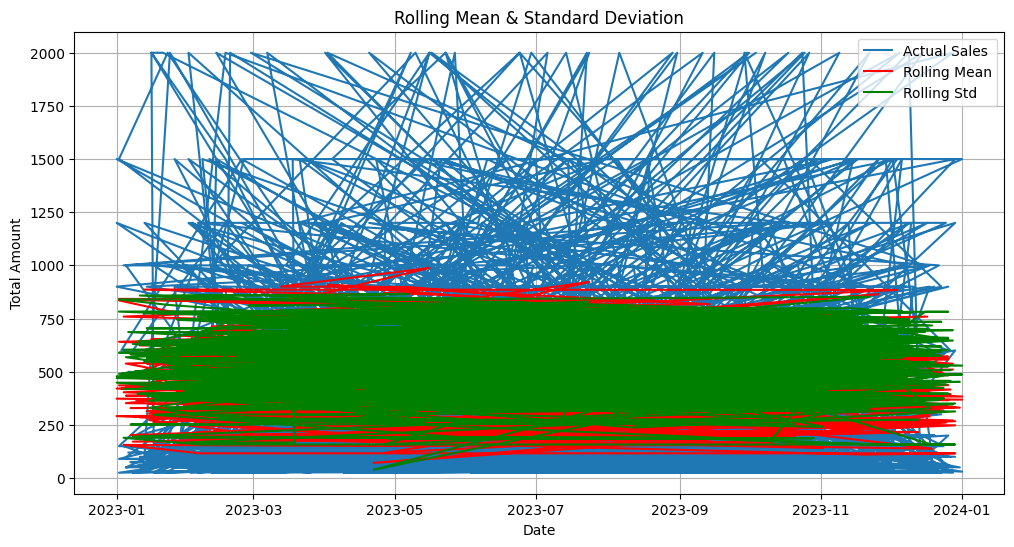

In [ ]:

# Rolling Statistics
rolling_mean = sales_data['Total Amount'].rolling(window=12).mean()  # 12-month rolling mean
rolling_std = sales_data['Total Amount'].rolling(window=12).std()    # 12-month rolling standard deviation

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Total Amount'], label='Actual Sales')
plt.plot(sales_data.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(sales_data.index, rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()


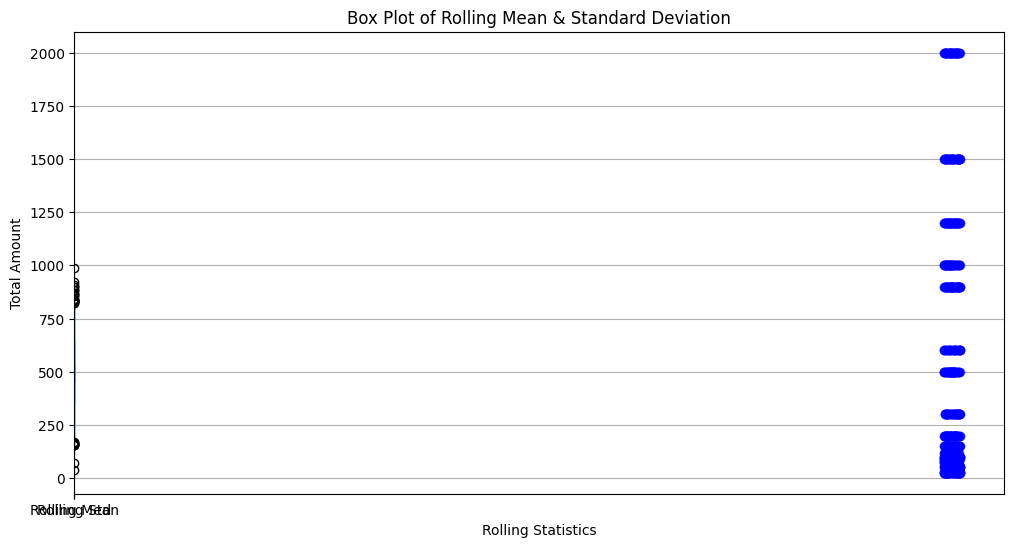

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have sales_data DataFrame and calculated rolling_mean, rolling_std

# Create a new figure
plt.figure(figsize=(12, 6))

# Combine rolling_mean and rolling_std into a single DataFrame for box plot
rolling_stats = pd.concat([rolling_mean, rolling_std], axis=1)
rolling_stats.columns = ['Rolling Mean', 'Rolling Std']

# Create box plot
rolling_stats.boxplot()

# Plot actual sales data points
plt.plot(sales_data['Total Amount'], 'bo', alpha=0.5)

# Set title and labels
plt.title('Box Plot of Rolling Mean & Standard Deviation')
plt.xlabel('Rolling Statistics')
plt.ylabel('Total Amount')

# Show plot
plt.grid(True)
plt.show()


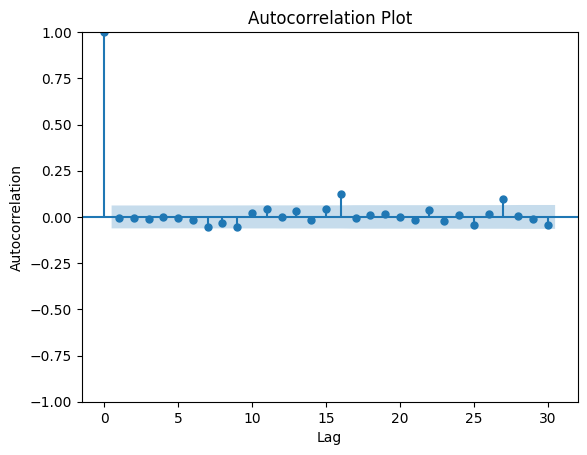

In [ ]:
# Autocorrelation
sm.graphics.tsa.plot_acf(sales_data['Total Amount'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

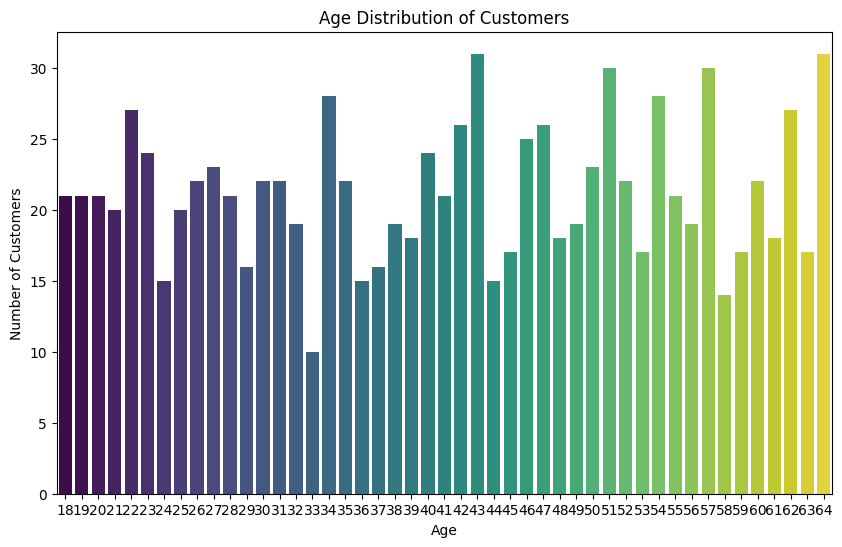

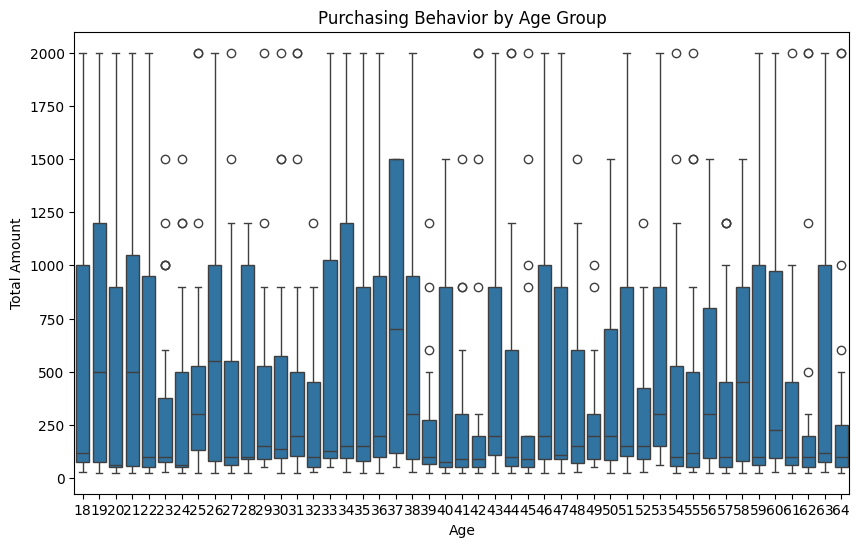

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive analysis of customer demographics
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Age', data=sales_data, palette='viridis', legend=False)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Analysis of purchasing behavior
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Total Amount', data=sales_data, legend=False)
plt.title('Purchasing Behavior by Age Group')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()




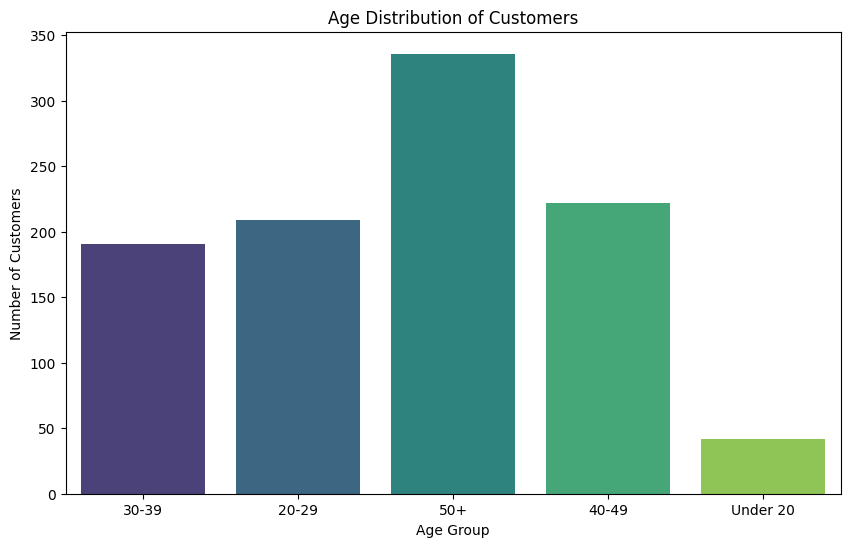

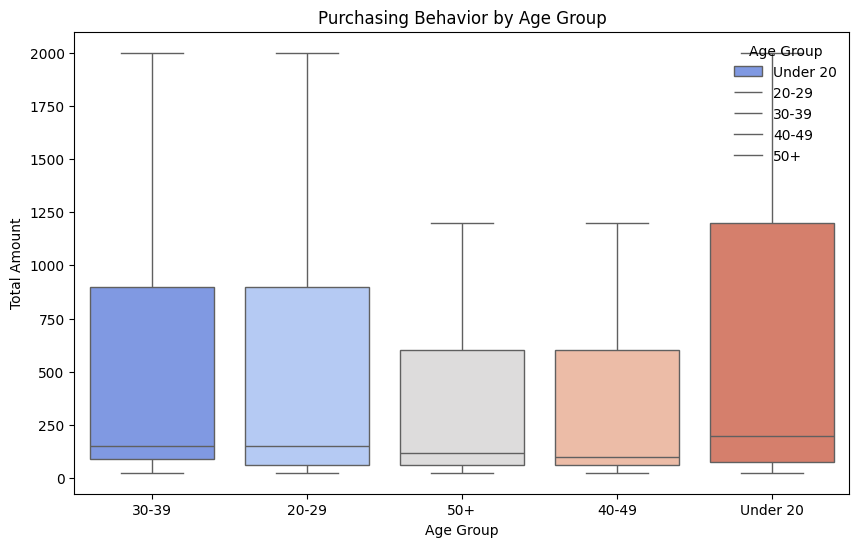

In [ ]:
# Define a function to categorize age into groups
def categorize_age(age):
    if age < 20:
        return 'Under 20'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50+'

# Create 'AgeGroup' column based on the 'Age' column
sales_data['AgeGroup'] = sales_data['Age'].apply(categorize_age)

# Descriptive analysis of customer demographics
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='AgeGroup', data=sales_data, palette='viridis', legend=False)
plt.title('Age Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

# Analysis of purchasing behavior
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='Total Amount', hue='AgeGroup', data=sales_data, palette='coolwarm', showfliers=False)
plt.title('Purchasing Behavior by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Age Group', loc='upper right', frameon=False, labels=['Under 20', '20-29', '30-39', '40-49', '50+'])
plt.show()



In [ ]:
# Perform one-hot encoding using pandas get_dummies() function
one_hot_encoded_data = pd.get_dummies(sales_data, columns=['Product Category'], prefix='Category')

# Display the one-hot encoded data
print(one_hot_encoded_data.head())


            Transaction ID Customer ID  Gender  Age  Quantity  Price per Unit  \
Date                                                                            
2023-11-24               1     CUST001    Male   34         3              50   
2023-02-27               2     CUST002  Female   26         2             500   
2023-01-13               3     CUST003    Male   50         1              30   
2023-05-21               4     CUST004    Male   37         1             500   
2023-05-06               5     CUST005    Male   30         2              50   

            Total Amount AgeGroup  Category_Beauty  Category_Clothing  \
Date                                                                    
2023-11-24           150    30-39             True              False   
2023-02-27          1000    20-29            False               True   
2023-01-13            30      50+            False              False   
2023-05-21           500    30-39            False               Tr

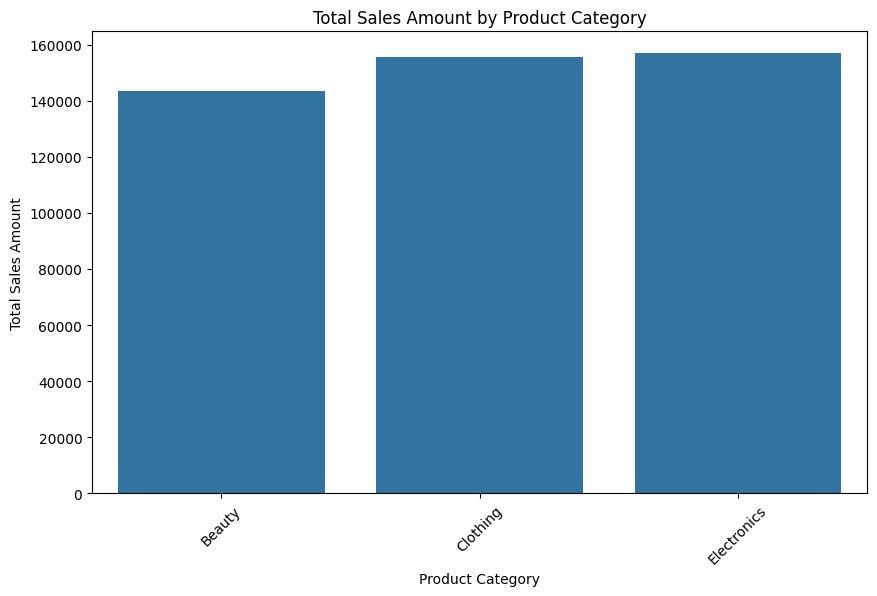

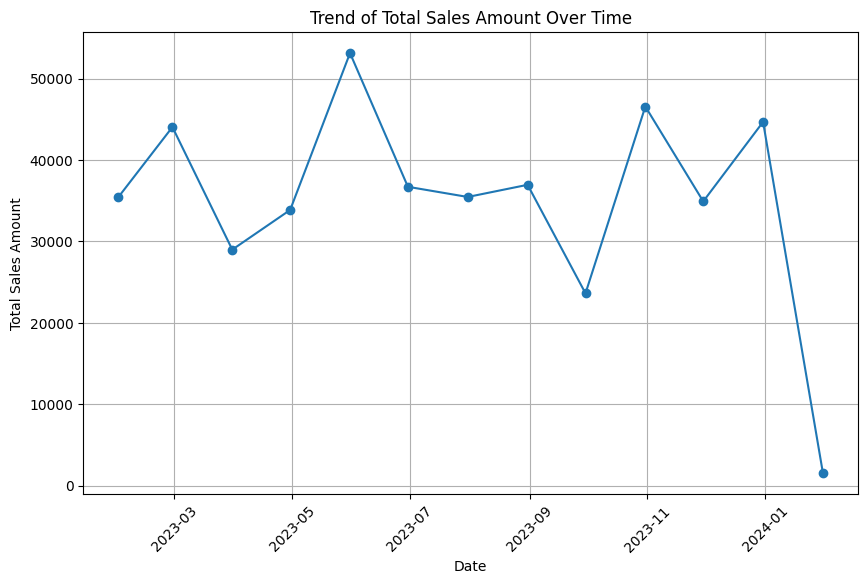

In [36]:
# Bar chart: Total sales amount by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=sales_data, estimator=sum, errorbar=None)
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


# Line plot: Trend of total sales amount over time
plt.figure(figsize=(10, 6))
# Reset index to bring 'Date' back as a column
sales_data = sales_data.reset_index()  # Reset the index
# Convert 'Date' column to datetime and set it as index
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)
# Resample monthly and calculate total sales
total_sales_over_time = sales_data.resample('M').sum()
plt.plot(total_sales_over_time.index, total_sales_over_time['Total Amount'], marker='o')
plt.title('Trend of Total Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


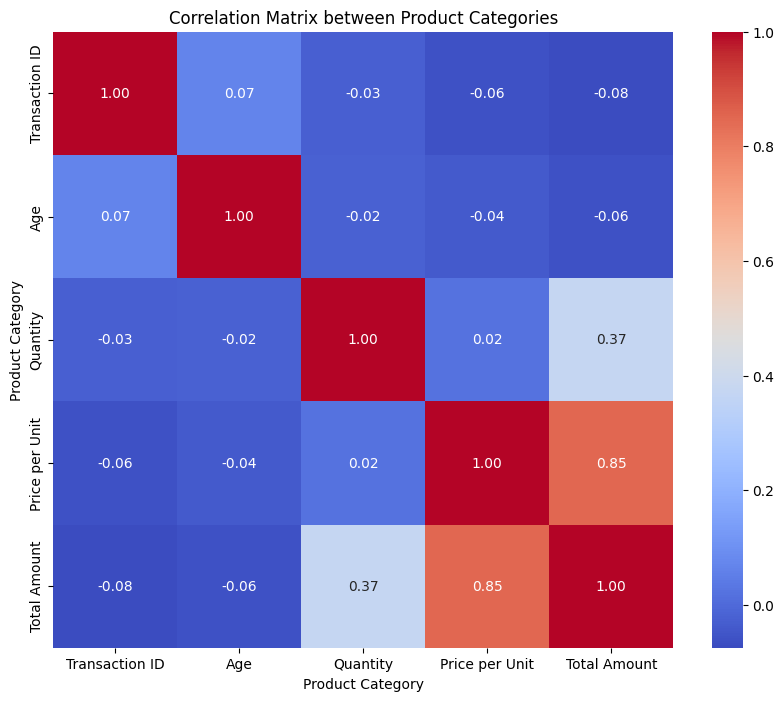

In [37]:
# Compute correlation matrix between product categories, excluding non-numeric columns
correlation_matrix = one_hot_encoded_data.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Product Category')
plt.show()

In [ ]:
#Based on the exploratory data analysis (EDA) conducted on your dataset, here are some actionable recommendations:

'''
Product Category Analysis:

1. Identify the top-selling product categories and allocate more resources towards marketing and stocking those products.
2. Investigate the performance of underperforming product categories and consider strategies to improve their sales, such as targeted promotions or product redesign.


Customer Demographics:

1. Understand the demographics of your customer base, such as age groups and gender distribution, to tailor marketing campaigns and product offerings accordingly.
2. Identify trends in purchasing behavior across different demographic segments and create personalized experiences to enhance customer satisfaction and loyalty.

Purchasing Behavior:

1.Analyze trends in purchasing behavior over time to identify seasonal patterns or trends that may influence sales.
2.Use insights from purchasing behavior to optimize inventory management, pricing strategies, and product assortment to meet customer demand effectively.


Association Rule Mining:

1.Explore association rules to identify product combinations that are frequently purchased together.
2.Leverage these insights for cross-selling and product bundling strategies to increase average order value and enhance the overall customer shopping experience.


Customer Segmentation:

1.Utilize clustering techniques to segment customers based on their purchasing behavior, demographics, or other relevant factors.
2.Tailor marketing strategies and promotions to target specific customer segments more effectively and maximize conversion rates.


Feedback Mechanisms:

1.Implement feedback mechanisms such as surveys, reviews, or customer support channels to gather insights directly from customers.
2.Use customer feedback to continuously improve products, services, and overall customer experience.


Competitive Analysis:

1.Conduct a competitive analysis to benchmark your performance against competitors in terms of product offerings, pricing, and customer satisfaction.
2.Identify areas where you can differentiate yourself and capitalize on opportunities to gain a competitive edge.


Data-driven Decision Making:

1.Encourage a data-driven culture within the organization by regularly analyzing and interpreting data to inform strategic decisions.
2.Invest in data analytics tools and capabilities to gain deeper insights into customer behavior and market trends.
3.By implementing these recommendations, you can leverage insights from your EDA to drive business growth, improve customer satisfaction, and stay ahead of the competition in the marketplace.

'''